## Holiday Package Prediciton

### 1) Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base.
One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.
The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.
### 2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction
The data consists of 20 column and 4888 rows.

In [56]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,\
                            recall_score, f1_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

In [3]:
df =pd.read_csv('C:/Users/lalit/Downloads/archive (2)/travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Cleaning

### Handling Missing Values
1. Handling Missing Values
2. Handling Duplicates
3. Check Data Type 
4. Understand the Dataset

In [4]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [9]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')

In [12]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [11]:
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [13]:
features_with_null = [features for features in df.columns if df[features].isnull().sum()>1]
for features in features_with_null:
    print(features,np.round(df[features].isnull().mean()*100,5),'% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [14]:
df[features_with_null].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing Null Values

1. Impute Median value for Age column
2. impute mode for type of contract
3. Impute Median for Duration of pich
4. Impute Mode for NumberOfFOllowups as it is discrete feature 
5. Impute mode for preferredPropertyStar
6. Impute Median for number of trips
7. Impute mode for number of children visiting
8. Impute median for monthly income

In [20]:
df.Age.fillna(df.Age.median(),inplace=True)

df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace= True)
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace = True)

In [21]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [23]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### Feature Engineering 

In [26]:
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis =1,inplace= True)

In [28]:
num_features = [features for features in df.columns if df[features].dtype !='O']
print('Num of Numerical Features :',len(num_features))

Num of Numerical Features : 13


In [31]:
cat_features = [features for features in df.columns if df[features].dtype == 'O']
print('Number of Categorical Features :',len(cat_features))

Number of Categorical Features : 6


In [34]:
discrete_features = [features for features in num_features if len(df[features].unique())<=25]
print('Number of Discrete_features :', len(discrete_features))

Number of Discrete_features : 9


In [35]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 4


In [37]:
df.drop('CustomerID',axis=1,inplace=True)

In [38]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [40]:
X = df.drop(['ProdTaken'],axis=1)
y = df['ProdTaken']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [42]:
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

In [44]:
num_transformer = StandardScaler()
Oh_encoder = OneHotEncoder(drop='first')
preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',Oh_encoder,cat_features),
        ('StandardScaler',num_transformer,num_features)
    ]
)


In [45]:
X_train = preprocessor.fit_transform(X_train)

In [46]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.714031,-0.649789,0.280718,-0.727208,-1.217370,-0.632714,1.409081,0.781435,0.460318,-0.067869
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.714031,-0.527737,-0.719632,1.768057,1.504605,-0.632714,1.409081,-1.279697,-1.005668,-0.777901
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.714031,-0.161582,1.281068,1.768057,-0.672975,1.580492,-0.046813,0.781435,-1.209722,-0.067869
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.470853,-0.771841,0.280718,0.520424,-0.128580,1.580492,-0.046813,0.781435,-0.017750,0.642163
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.714031,-0.527737,1.281068,0.520424,2.593396,-0.632714,0.681134,-1.279697,-0.423411,-0.067869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.714031,-0.649789,1.281068,-0.727208,-0.672975,-0.632714,-1.502707,0.781435,-0.531926,0.642163
3417,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.470853,-0.893893,-0.719632,1.768057,-1.217370,-0.632714,1.409081,0.781435,1.512744,-0.067869
3418,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.470853,1.547143,0.280718,-0.727208,2.049001,-0.632714,-0.774760,0.781435,-0.357400,0.642163
3419,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.470853,1.791246,1.281068,-0.727208,-0.128580,-0.632714,-1.502707,0.781435,-0.250765,0.642163


In [47]:
X_test = preprocessor.transform(X_test)

In [48]:
X_test

array([[ 0.        ,  0.        ,  0.        , ..., -1.27969734,
        -0.73033753, -0.777901  ],
       [ 1.        ,  0.        ,  0.        , ..., -1.27969734,
        -0.66394968, -0.06786916],
       [ 1.        ,  0.        ,  0.        , ...,  0.78143477,
        -0.417017  , -0.777901  ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.78143477,
        -0.08075222, -0.06786916],
       [ 1.        ,  0.        ,  1.        , ...,  0.78143477,
         1.97576639, -0.06786916],
       [ 1.        ,  0.        ,  1.        , ..., -1.27969734,
         1.28837951, -1.48793284]])

In [49]:
y_train

736     0
1615    0
336     1
4526    0
2665    0
       ..
4426    0
466     0
3092    0
3772    0
860     1
Name: ProdTaken, Length: 3421, dtype: int64

In [54]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Gradient Boost': GradientBoostingClassifier()
    
}

In [55]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 =  f1_score(y_train,y_train_pred)
    model_train_precision =  precision_score(y_train,y_train_pred)
    model_train_recall =  recall_score(y_train,y_train_pred)
    model_train_rocauc =  roc_auc_score(y_train,y_train_pred)

    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc = roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model Preformance for training Set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc))

     
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc))

    print('='* 35)
    print('\n')


Logistic Regression
Model Preformance for training Set
- Accuracy: 0.8451
- F1 score: 0.4252
- Precision: 0.7101
- Recall: 0.3034
- Roc Auc Score: 0.6373
----------------------------------
Model performance for Test set
- Accuracy: 0.8432
- F1 score: 0.4279
- Precision: 0.6719
- Recall: 0.3139
- Roc Auc Score: 0.6393


Decision Tree
Model Preformance for training Set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8991
- F1 score: 0.7319
- Precision: 0.7266
- Recall: 0.7372
- Roc Auc Score: 0.8368


Random Forest
Model Preformance for training Set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9182
- F1 score: 0.7321
- Precision: 0.9425
- Recall: 0.5985
- Roc Auc Score: 0.7951


Gradient Boost
Model Preformance for training Set

In [57]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [58]:
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params)
                   ]

In [61]:
model_params = {}
for name, model,params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(X_train,y_train)
    model_params[name] = random.best_params_

for model_name in model_params:
    print(f'---------Best Params for {model_name}---------')
    print(model_params[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------Best Params for RF---------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}


In [62]:
models = {
    'Random Forest' : RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_features=7,max_depth=None)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 =  f1_score(y_train,y_train_pred,average= 'weighted')
    model_train_precision =  precision_score(y_train,y_train_pred)
    model_train_recall =  recall_score(y_train,y_train_pred)
    model_train_rocauc =  roc_auc_score(y_train,y_train_pred)

    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc = roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model Preformance for training Set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc))

     
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc))

    print('='* 35)
    print('\n')


Random Forest
Model Preformance for training Set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9243
- F1 score: 0.9187
- Precision: 0.9312
- Recall: 0.6423
- Roc Auc Score: 0.8157




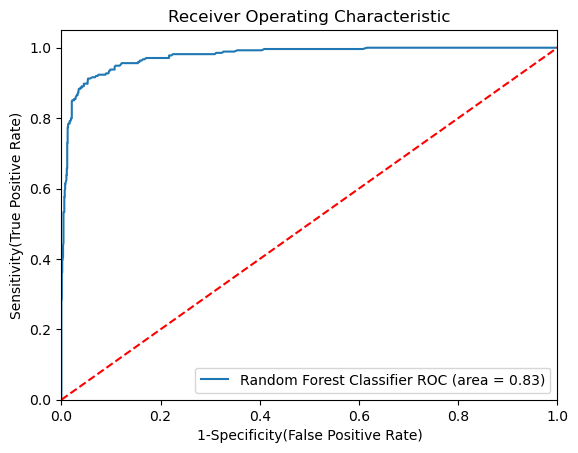

In [63]:
plt.figure()

auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),
    'auc':  0.8325
},
    
]

for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)

    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 